In [27]:
import numpy as np
import matplotlib.pyplot as plt
from stats import MetropolisHastings

In [28]:
particle_number = 10000
bounds = [2, 3, 4]
kb = 1.38e-23
mass = 9e-28
T = 298
dx = 5000

In [29]:
def clamp_position_reflect_velocities(position, velocity, bounds):
	for i in range(len(bounds)):
		if position[i] > bounds[i]:
			velocity[i] = -velocity[i]
			distance_beyond = position[i] - bounds[i]
			position[i] = bounds[i] - distance_beyond
		if position[i] < 0:
			velocity[i] = -velocity[i]
			position[i] = - position[i]

	return (position, velocity)

In [30]:
positions = []

for bound in bounds:
	positions.append(np.random.rand(particle_number)*bound)

positions = np.asarray(positions)

print(positions[:,0])

[1.10770752 2.56252024 2.73466537]


In [31]:
def maxwell_boltzmann(v,m,kb,t):
	d1 = 2*np.pi*kb*t
	c1 = (m/d1)**(1/2)
	d2 = 2*kb*t
	c2 = -(m*v**2)/d2
	return c1*np.exp(c2)

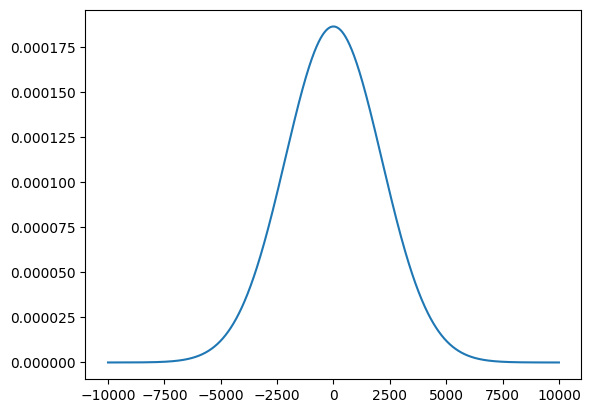

In [32]:
vs = np.linspace(-10000,10000,1000)
probabilities = maxwell_boltzmann(vs,mass,kb,T)

plt.plot(vs,probabilities)

In [33]:
def maxwell_boltzmann_sampler(v):
	return maxwell_boltzmann(v,mass,kb,T)

In [34]:
velocities = []

for i in range(len(bounds)):
	x0 = 0
	vis = MetropolisHastings(maxwell_boltzmann_sampler,x0,dx,particle_number)[1:]
	velocities.append(vis)

velocities = np.asarray(velocities)

print(velocities[:,0])

[767.94352724   0.           0.        ]


In [35]:
def take_time_step(positions, velocities, dt):
	for i in range(particle_number):
		position = positions[:,i]
		velocity = velocities[:,i]
		new_position = position + velocity*dt
		positions[:,i] = new_position
	return positions

In [36]:
energies_region1 = []
energies_region2 = []
times = []

In [37]:
dt = 1e-5
final_time = 0.02
number_of_steps = int(final_time/dt)
bounds[2] = 8
for i in range(number_of_steps):
	energy1 = 0
	energy2 = 0
	num_energy1 = 0
	num_energy2 = 0
	new_positions = take_time_step(positions,velocities,dt)
	for particle in range(particle_number):
		position = new_positions[:,particle]
		velocity = velocities[:,particle]
		clamped_xs, clamped_vs = clamp_position_reflect_velocities(position,velocity,bounds)
		pe = 0.5 * mass * np.linalg.norm(velocity)**2
		if clamped_xs[2] > 4:
			energy2 += pe
			num_energy2 += 1
		else:
			energy1 += pe
			num_energy1 += 1
		new_positions[:,particle] = clamped_xs
		velocities[:,particle] = clamped_vs
	positions = new_positions
	times.append(i*dt)
	if num_energy1 != 0:
		energy1 = energy1/num_energy1
	if num_energy2 != 0:
		energy2 = energy2/num_energy2
	energies_region1.append(energy1)
	energies_region2.append(energy2)

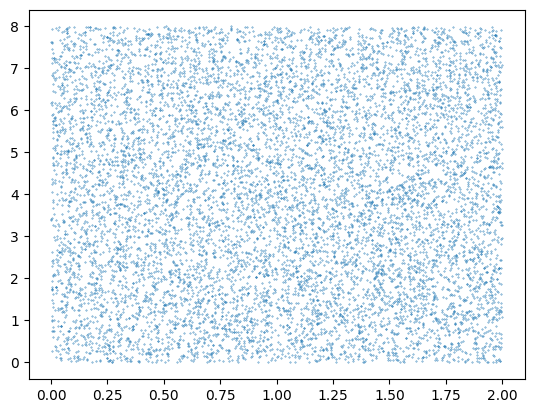

In [41]:
xs = positions[0,:]
zs = positions[2,:]
plt.scatter(xs,zs,s = 0.1)

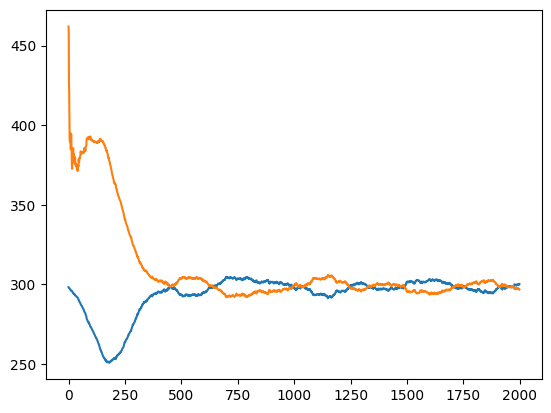

In [39]:
plt.plot(2/3*np.asarray(energies_region1)/kb)
plt.plot(2/3*np.asarray(energies_region2)/kb)